# Examination of Medical Condition, Severity of Illness, and Number of Facility Discharges on US Medical Care Expenses 

### This analysis aims to show the extent to which illness severity, types of procedures, and the number of discharges factor into the overall inpatient costs and charges over 8 years and across 282 US healthcare facilities. 

### Definitions
##### Charge- cost to the patient
##### Cost- cost to administer care
##### Discharge - total care has been administered

##### Data: https://www.kaggle.com/fabriciosantos/hospitalization-costs
##### Tableau: https://public.tableau.com/app/profile/katie6486/viz/InpatientMedicalExpenses/InpatientExpenses

In [1]:
# Import Libraries 
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import statistics

In [2]:
# Import data source and store as a DataFrame
df = pd.read_csv("/Users/katiejohnson/Desktop/Hospital_Cost.csv", header=0)

## Inpatient Totals Across Severities

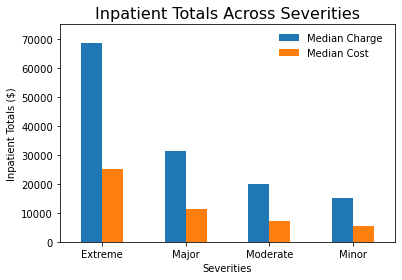

<Figure size 720x576 with 0 Axes>

In [3]:
# Define data
NoNA_2 = df.loc[df['APR Severity of Illness Description'] != 'Not Applicable']
df_grouped = NoNA_2.groupby('APR Severity of Illness Description').median()[['Median Charge','Median Cost']]

# Sort values
df_grouped.sort_values(by='Median Charge',ascending=[False]).plot.bar()

# Title, legend, labels
plt.title('Inpatient Totals Across Severities', loc='center', size=16)
plt.legend(bbox_to_anchor=([0.99, 1, 0, 0]), frameon=False)
plt.ylabel('Inpatient Totals ($)')
plt.xlabel('Severities')
plt.xticks(rotation=360)

# Adjust limits & display chart
plt.ylim([0, 75000])
plt.figure(figsize=(10, 8))
plt.show()

#### The highest severities were more costly to administer and receive compared with the lowest. Patients with more serious medical conditions typically paid more, as did the facilities that administered their treatment(s).

## Inpatient Totals Across Procedures

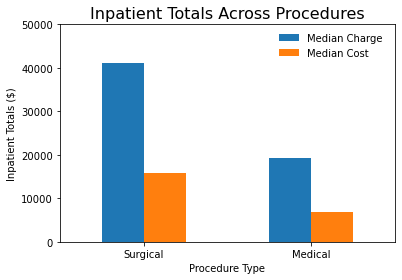

<Figure size 720x576 with 0 Axes>

In [4]:
# Define data
NoNA_2 = df.loc[df['APR Medical Surgical Description'] != 'Other']
df_grouped = NoNA_2.groupby('APR Medical Surgical Description').median()[['Median Charge','Median Cost']]

# Sort values
df_grouped.sort_values(by='Median Charge',ascending=[False]).plot.bar()

# Title, legend, labels
plt.title('Inpatient Totals Across Procedures', loc='center', size=16)
plt.legend(bbox_to_anchor=([0.99, 1, 0, 0]), frameon=False)
plt.ylabel('Inpatient Totals ($)')
plt.xlabel('Procedure Type')
plt.xticks(rotation=360)

# Adjust limits & display chart
plt.ylim([0, 50000])
plt.figure(figsize=(10, 8))
plt.show()

#### Surgical procedures had higher median costs and charges compared with medical procedures. Patients with surgical procedures typically paid more than those with medical procedures, as did the facilities that treated them. 

## Inpatient Totals for Number of Discharges

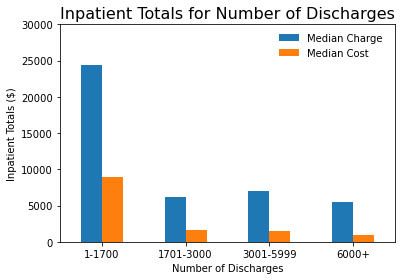

1-1700       1081222
1701-3000        339
3001-5999        101
6000+             10
Name: Discharge_Bins, dtype: int64

In [5]:
# Create numbered ranges for discharges
cut_labels_4 = ['1-1700', '1701-3000', '3001-5999', '6000+']
cut_bins = [0, 1700, 3000, 5999, 6999]
df['Discharge_Bins'] = pd.cut(df['Discharges'], bins=cut_bins, labels=cut_labels_4)

# Plot bars
df_grouped = df.groupby('Discharge_Bins').median()[['Median Charge','Median Cost']]
df_grouped.plot(kind='bar')

# Title, legend, labels
plt.title('Inpatient Totals for Number of Discharges', loc='center', size=16)
plt.legend(bbox_to_anchor=([0.99, 1, 0, 0]), frameon=False)
plt.ylabel('Inpatient Totals ($)')
plt.xlabel('Number of Discharges')
plt.xticks(rotation=360)

# Adjust limits
plt.ylim([0, 30000])
plt.show()

df['Discharge_Bins'].value_counts()

#### Inpatient discharges between 1-1700 were the most abundant and most costly across all facilities sampled. In addition, charges outweighed costs showing the extent to which patients pay to receive treatment (i.e., charge) compared to the price facilities pay to administer those treatments (i.e., cost).  

## Data Prep for Correlation

In [6]:
# Dummy data for condition type & severity
df_with_dummies = pd.get_dummies(df, columns=['APR Medical Surgical Code','APR Severity of Illness Code'])

df_with_dummies.head(3)

,Year,Facility Id,Facility Name,APR DRG Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,...,Median Cost,Discharge_Bins,APR Medical Surgical Code_M,APR Medical Surgical Code_P,APR Medical Surgical Code_U,APR Severity of Illness Code_0,APR Severity of Illness Code_1,APR Severity of Illness Code_2,APR Severity of Illness Code_3,APR Severity of Illness Code_4
0,2016,4,Albany Memorial Hospital,194,Heart Failure,Minor,Medical,2,8375.41,8375.41,...,3585.05,1-1700,1,0,0,0,1,0,0,0
1,2016,4,Albany Memorial Hospital,194,Heart Failure,Moderate,Medical,40,14029.82,12176.95,...,5253.15,1-1700,1,0,0,0,0,1,0,0
2,2016,4,Albany Memorial Hospital,194,Heart Failure,Major,Medical,70,23921.77,20229.81,...,9068.10,1-1700,1,0,0,0,0,0,1,0


In [7]:
# Rename dummy data
df_rn_dummies = df_with_dummies.rename(columns= {'APR Medical Surgical Code_M': 'Medical',
                                'APR Medical Surgical Code_P': 'Surgical',
                                'APR Medical Surgical Code_U': 'Med Surg NA',
                                'APR Severity of Illness Code_0': 'Severity NA',
                                'APR Severity of Illness Code_1': 'Minor',
                                'APR Severity of Illness Code_2': 'Moderate', 
                                'APR Severity of Illness Code_3': 'Major', 
                                'APR Severity of Illness Code_4': 'Extreme'})
df_rn_dummies.head(2)

,Year,Facility Id,Facility Name,APR DRG Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,...,Median Cost,Discharge_Bins,Medical,Surgical,Med Surg NA,Severity NA,Minor,Moderate,Major,Extreme
0,2016,4,Albany Memorial Hospital,194,Heart Failure,Minor,Medical,2,8375.41,8375.41,...,3585.05,1-1700,1,0,0,0,1,0,0,0
1,2016,4,Albany Memorial Hospital,194,Heart Failure,Moderate,Medical,40,14029.82,12176.95,...,5253.15,1-1700,1,0,0,0,0,1,0,0


## Correlates of Charge

In [8]:
# Filter "Charge" variables for correlation
filtered_charge = df_rn_dummies.loc[:, ['Medical',
                                  'Surgical',
                                  'Minor',
                                  'Moderate',
                                  'Major',
                                  'Extreme',
                                  'Discharges',
                                  'Median Charge']]

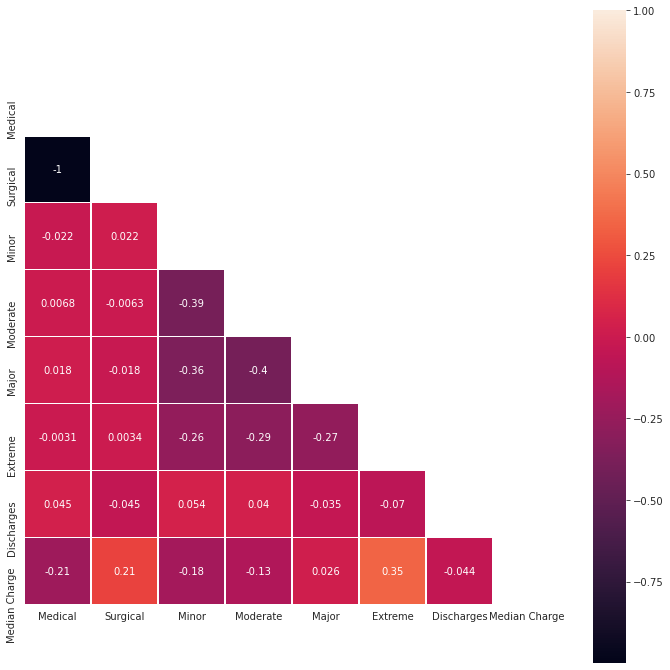

In [9]:
# Correlation filtered on Charge
corr_df_1 = filtered_charge.corr()
mask = np.zeros_like(corr_df_1)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr_df_1, mask=mask, vmax=1.00, annot=True, linewidths=.5, square=True)

In [10]:
#Regression model (Charge)
variables = ['Medical', 
             'Surgical', 
             'Minor',
             'Moderate', 
             'Major', 
             'Extreme', 
             'Discharges']
Median_Charge = ['Median Charge']

dep_var = filtered_charge[Median_Charge]
ind_vars = filtered_charge[variables]
ind_vars = sm.add_constant(ind_vars)
reg_model_charge = sm.OLS(dep_var,ind_vars).fit()

reg_model_charge.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Median Charge   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                 4.060e+04
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:55:35   Log-Likelihood:            -1.3622e+07
No. Observations:             1081672   AIC:                         2.724e+07
Df Residuals:                 1081665   BIC:                         2.724e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.939e+04   3465.721     25.792      0.000    8.26e+04    9.62e+04
Medical     1.416e+11   2.11e+14      0.001      0.999   -4.14e+14    4.15e+14
Surgical    1.416e+11   2.11e+14      0.001      0.999   -4.14e+14    4.15e+14
Minor      -1.416e+11   2.11e+14     -0.001      0.999   -4.15e+14    4.14e+14
Moderate   -1.416e+11   2.11e+14     -0.001      0.999   -4.15e+14    4.14e+14
Major      -1.416e+11   2.11e+14     -0.001      0.999   -4.15e+14    4.14e+14
Extreme    -1.416e+11   2.11e+14     -0.001      0.999   -4.15e+14    4.14e+14
Discharges    -1.6078      0.843     -1.907      0.057      -3.260       0.045
==============================================================================
Omnibus:                  1945674.697   Durbin-Watson:                   1.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8143457259.881
Skew:                          12.686   Prob(JB):                         0.00
Kurtosis:                     427.314   Cond. No.                     6.37e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.89e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Extent to which these factors relate to the median charge

<AxesSubplot:title={'center':'Correlates of Median Charge'}>

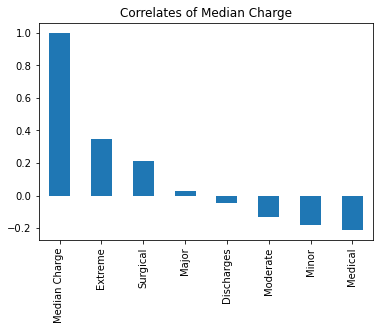

In [13]:
Median_charge = corr_df_1[['Median Charge']]
Median_charge.sort_values(by='Median Charge', ascending=False).plot(kind='bar',title='Correlates of Median Charge',legend='')

#### All factors are weakly correlated to the average charge and account for around 18% of the total variance, though not significantly. 

#### Severities, number of discharges, and procedure type do not significantly contribute to what is typically charged to patients. 

## Correlates of Cost

In [191]:
# Filter "Cost" variables for correlation
filtered_cost = df_rn_dummies.loc[:, ['Medical',
                                  'Surgical',
                                  'Minor',
                                  'Moderate',
                                  'Major',
                                  'Extreme',
                                  'Discharges',
                                  'Median Cost']]

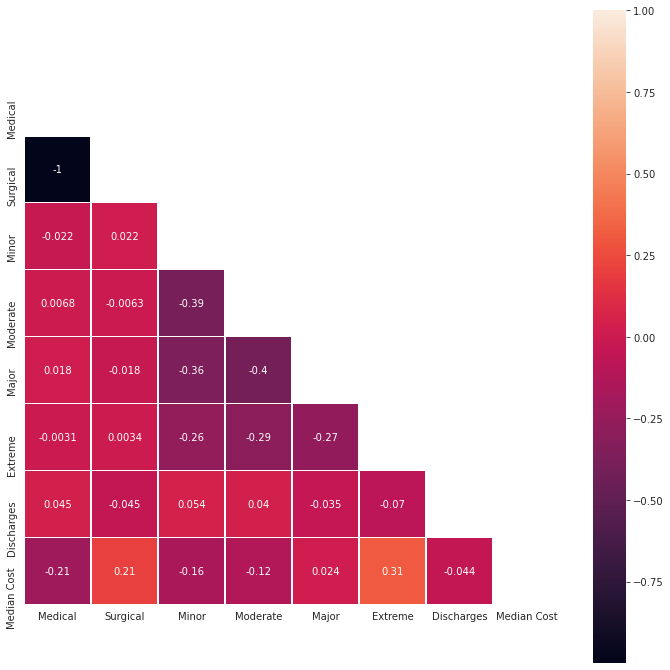

In [194]:
# Correlation filtered on Cost
corr_df_2 = filtered_cost.corr()
mask = np.zeros_like(corr_df_2)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr_df_2, mask=mask, vmax=1.00, annot=True, linewidths=.5, square=True)

In [195]:
#Regression model (Cost)
variables = ['Medical', 
             'Surgical', 
             'Minor',
             'Moderate', 
             'Major', 
             'Extreme', 
             'Discharges']
Median_Cost = ['Median Cost']

dep_var = filtered_cost[Median_Cost]
ind_vars = filtered_cost[variables]
ind_vars = sm.add_constant(ind_vars)
reg_model_cost = sm.OLS(dep_var,ind_vars).fit()

reg_model_cost.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Median Cost   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                 3.330e+04
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:04:48   Log-Likelihood:            -1.2650e+07
No. Observations:             1081672   AIC:                         2.530e+07
Df Residuals:                 1081665   BIC:                         2.530e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.76e+04   1411.975     19.547      0.000    2.48e+04    3.04e+04
Medical    -9.036e+08   8.62e+13  -1.05e-05      1.000   -1.69e+14    1.69e+14
Surgical   -9.036e+08   8.62e+13  -1.05e-05      1.000   -1.69e+14    1.69e+14
Minor       9.036e+08   8.62e+13   1.05e-05      1.000   -1.69e+14    1.69e+14
Moderate    9.036e+08   8.62e+13   1.05e-05      1.000   -1.69e+14    1.69e+14
Major       9.036e+08   8.62e+13   1.05e-05      1.000   -1.69e+14    1.69e+14
Extreme     9.037e+08   8.62e+13   1.05e-05      1.000   -1.69e+14    1.69e+14
Discharges    -2.1735      0.344     -6.327      0.000      -2.847      -1.500
==============================================================================
Omnibus:                  3389533.221   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    2999944036008.577
Skew:                          48.575   Prob(JB):                         0.00
Kurtosis:                    8160.998   Cond. No.                     6.37e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.89e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Extent to which these factors relate to the average cost

<AxesSubplot:title={'center':'Correlates of Median Cost'}>

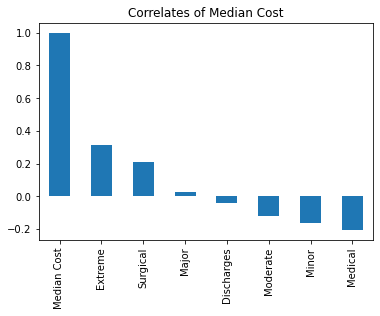

In [196]:
Median_cost = corr_df_2[['Median Cost']]
Median_cost.sort_values(by='Median Cost', ascending=False).plot(kind='bar',title='Correlates of Median Cost',legend= '')

#### All factors are weakly correlated to the median cost and account for around 16% of the total variance, though not significantly.

#### Severities, number of discharges, and procedure type do not significantly contribute to the overall cost to the facility. 

## Implications & Considerations

This analysis explores the extent to which the severity of illness, procedure type, and the number of discharges factor into inpatient expenses by looking at the median cost and median charge respectively.

Cost is defined as the median cost of administering treatment; charge is the median amount the patient pays. 

In this sample, the degree of severity, procedure type, and the number of discharges had a higher median cost and charge, meaning that they were expensive for both the facility and patient alike. These findings, however, were not significant or strongly correlated. 

It is important to note that severity, procedure type, and the number of discharges are not unrelated factors and may share qualities like illness type. Greater predictability can be achieved by considering other factors that don't overlap like facility specialty, zip code,  insurance type, etc. This overlap makes it difficult to attain accurate predictability as shown. 

Although not statistically significant, this analysis demonstrates that over 8-years and the 282 facilities sampled, the severity of illness, procedure type, and the number of discharges tended to be more expensive for both facilities and patients alike. 

Moving forward, patients would benefit from comparing facilities and insurance types given their specific needs. Insurance companies might also consider the financial impact these factors might have on their recipients and negotiate accordingly.